# Imports

In [1]:
import pickle

import torch
from torchvision import transforms
from model import SegmentationModule

from PIL import Image
import matplotlib.pyplot as plt

# Load model

In [2]:
model_path = "./models/MobileNetV2.pkl"
model_ckp_path = "./models/checkpoints/MobileNetV2-v1.ckpt"

In [3]:
with open(model_path, 'rb') as f:
    model = pickle.load(f)
checkpoint = torch.load(model_ckp_path, weights_only=True, map_location=torch.device('mps'))
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

# Load and pre-process image

In [4]:
image_path = "./data/LIVECell_dataset_2021/images/livecell_test_images/BT474_Phase_D3_2_02d04h00m_1.tif"
transform_path = "./models/transform.pkl"

In [5]:
with open(transform_path, 'rb') as f:
    transform = pickle.load(f)

image = Image.open(image_path).convert('RGB')
image = transform(image).unsqueeze(0)

# Get predictions

In [6]:
# Run inference on the dummy image
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    output = model(image)
# Process the output (logits -> probability map -> segmentation mask)
output_prob = torch.sigmoid(output)  # Apply sigmoid to get probabilities
output_mask = output_prob.argmax(dim=1)  # Get the predicted class (for segmentation)

# Display

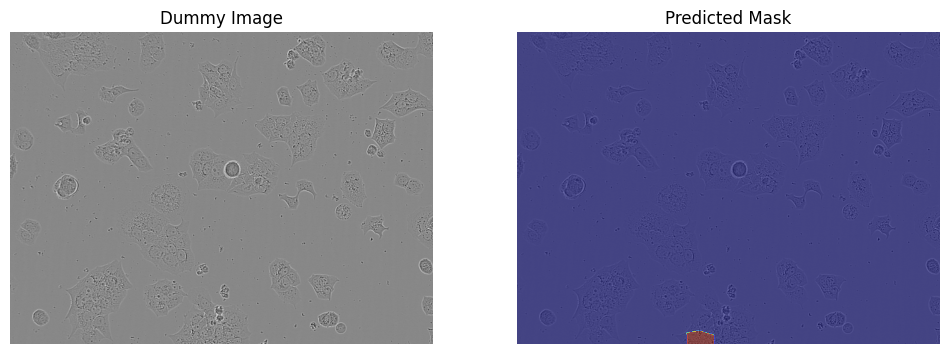

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Denormalize the image
image = image - image.min()
image = image / image.max() * 255
image = image[0].int().permute(1, 2, 0).cpu().numpy() 
axes[0].imshow(image)
axes[0].set_title('Dummy Image')
axes[0].axis('off')

axes[1].imshow(image)
axes[1].imshow(output_mask[0].cpu().numpy(), cmap='jet', alpha=0.5)
axes[1].set_title('Predicted Mask')
axes[1].axis('off')

plt.show()